In [1]:
import os
import pandas as pd
from astroquery.mast import Observations

In [2]:
def number_of_target_pixel_files(tic):
    # supply TIC
    # restrict the mission to TESS
    try:
        objectname = "TIC " + str(tic)
        obs_table = Observations.query_criteria(obs_collection=['TESS'],
                                            objectname=objectname,
                                            radius=0)

        if len(obs_table) > 0:
            products = Observations.get_product_list(obs_table[0])
            products = Observations.filter_products(products,
                                                   dataproduct_type="timeseries",
                                                   extension="fits",
                                                   productType="SCIENCE",
                                                   productSubGroupDescription="TP")
        else:
            return 0
    except Exception as e:
        return -1
    
    return len(products)

In [3]:
joined_df = pd.read_csv("joined.csv")
joined_df.head()

,kic,TCE_ID,tic,disposition,not_transit,pn,n_plan,period,depth
0,757099,000757099-01,122785244,FP,1,1,1,0.723930,72.852405
1,892667,000892667-01,122785148,FP,1,1,1,2.262005,30.407424
2,1025986,001025986-01,122784720,FP,1,1,1,275.071787,204.701339
3,1026133,001026133-01,122784832,FP,1,1,2,1.346373,21.063829
4,1026133,001026133-02,122784832,FP,1,2,2,186.181229,278.023096


In [4]:
joined_df["target_pixel_files"] = joined_df["tic"].apply(number_of_target_pixel_files)

In [5]:
# connection issues?
len(joined_df[joined_df["target_pixel_files"] == -1])

0

In [6]:
# retry where there were connection issues
joined_df.loc[joined_df["target_pixel_files"] == -1, "target_pixel_files"] = joined_df[joined_df["target_pixel_files"] == -1]["tic"].apply(number_of_target_pixel_files)

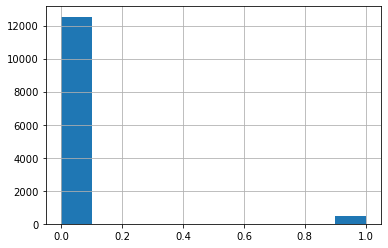

In [7]:
joined_df["target_pixel_files"].hist()

In [8]:
joined_df.to_csv("joined_with_tess_tp_counts.csv")